# openCV Image Processing

In this notebook you will try some basics of image processing using openCV.

## Prerequisites

Install opencv: 

`pip install opencv-python 
pip install opencv-contrib-python `

Install matplotlib and numpy:

`pip install matplotlib 
pip install numpy `

If you are using Anaconda (root interpreter), you can install opencv from anaconda sources:

`conda install -c conda-forge opencv`

Or you can navigate to `/path/to/Anaconda/Scripts` and run pip commands from here.


## Let's begin!

To start, we need to read the image using [imread](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html) function.

<class 'numpy.ndarray'>
uint8


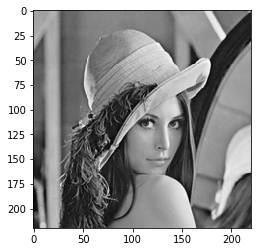

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

image_path = 'openCV-data/lena.png'

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
print(type(img))
print(img.dtype)

plt.imshow(img, cmap='gray')

Note that the image is read as *numpy.ndarray*. That means that you can add constants to the image, multiply them, etc - do any mathematical operation that is valid for numpy.ndarray.

Also the *cv2.IMREAD_GRAYSCALE* parameter tells cv2 to read image in grayscale mode (1 channel, only brightness preserved). We will stick with 1 channel for the ease of coding and understanding.

By default, image type is *uint8*, which is inconvinient for manipulation as we are bounded to [0, 255] values of the pixels. That can lead to [overflowed](http://projects.webappsec.org/w/page/13246946/Integer%20Overflows) pixels.

To overcome that, before any manipulation, we should convert image to *float64(or 32, or 16)* type, perform manipulation, normalize image to [0, 255] values, convert image back to uint8 and then show it. 

Text(0.5,1,'Normalized')

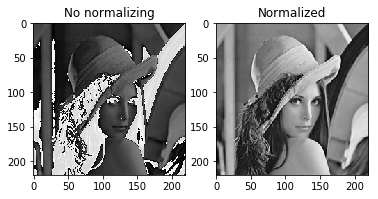

In [2]:
normalizedImg = img.copy()

img += 100000

normalizedImg = normalizedImg.astype(np.float64)
normalizedImg += 100000
cv2.normalize(normalizedImg,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
normalizedImg = normalizedImg.astype(np.uint8)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap='gray')
ax1.set_title('No normalizing')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(normalizedImg, cmap='gray')
ax2.set_title('Normalized')

## Tasks

I intentionally give no detailed explenation on tasks. All the theory and formulas will be covered in lectures, all the needed functions of cv2 package are provided in the hyperlinks. The rest can be googled).

Now you are ready to perform some tasks (I hope ))). Issues marked with \* are more complicated than others.
1. Generate noise ([random](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html), salt n pepper) + visualize it
2. Add differnet types of noise to your image and blur it - use different [blur](https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html) functions for that
3. Get high frequencies image from the image using using gaussian blur
4. Implement gamma correction technique and apply it to the image
5. Apply gradient filter [-1,1] and compare its work with [advanced filters](https://docs.opencv.org/3.2.0/d5/d0f/tutorial_py_gradients.html) for edges detection 
5. \* Implement Grayworld balancing technique and apply it to the image. Here the image should be read with 3 channels.
6. \* Implement [pipeline](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html) for matching objects in different images. For this issue you should find some image with object(e.g. bear/iphone/Putin), add it to another image and then match initial object image in new image (with object added).

## 1

In [25]:
matrix = np.zeros((220,220))

In [45]:
matrix = matrix+170

In [46]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = matrix
out = np.copy(img)
row,col = image.shape
s_vs_p = 0.5
amount = 0.01
out = np.copy(image)
      # Salt mode
num_salt = np.ceil(amount * image.size * s_vs_p)
coords_1 = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
out[coords_1] = 255

num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
coords_2 = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
out[coords_2] = 0

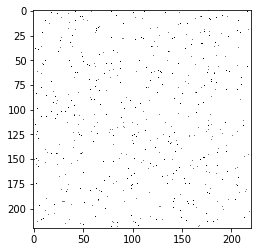

In [47]:
plt.imshow(out, cmap='gray')

In [11]:
image = np.zeros((220, 220))
row,col= image.shape
mean = 0
var = 0.01
sigma = var**0.5
gauss = np.random.normal(mean,sigma,(row,col))
gauss = gauss.reshape(row,col)
noisy = image + gauss

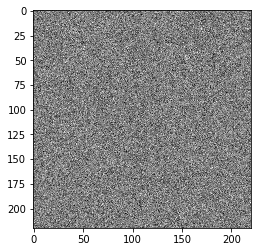

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(noisy, cmap='gray')


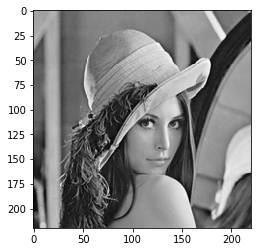

In [159]:
plt.imshow(img, cmap='gray')

## 2 

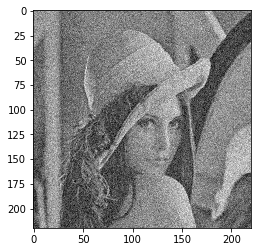

In [61]:
img2 = img.astype('float') + noisy*255
cv2.normalize(img2,  img2, 0, 255, cv2.NORM_MINMAX)
img2 = img2.astype(np.uint8)
plt.imshow(img2, cmap='gray')


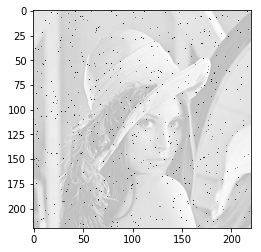

In [62]:
img3 = img.astype('float') + out
#img3 += 100000
cv2.normalize(img3,  img3, 0, 255, cv2.NORM_MINMAX)
img3 = img3.astype(np.uint8)
plt.imshow(img3, cmap='gray')

In [53]:
img3.shape

(220, 220)

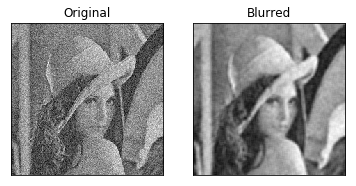

In [14]:
blur = cv2.blur(img2,(5,5)) 
plt.subplot(121),plt.imshow(img2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

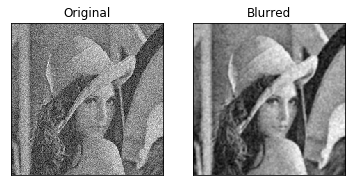

In [15]:
blur = cv2.GaussianBlur(img2,(5,5),0)
plt.subplot(121),plt.imshow(img2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

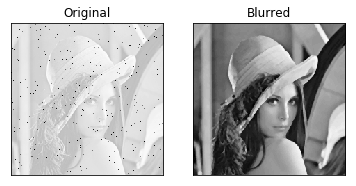

In [63]:
blur = cv2.medianBlur(img3,3)
plt.subplot(121),plt.imshow(img3, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

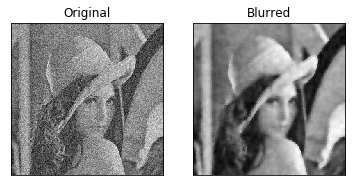

In [17]:
blur = cv2.bilateralFilter(img2,9,75,75)
plt.subplot(121),plt.imshow(img2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 3

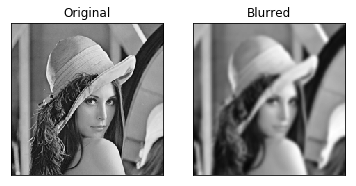

In [68]:
blur = cv2.GaussianBlur(img,(11,11),0)
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

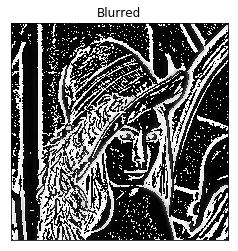

In [69]:
blurred = img - blur
cv2.normalize(blurred,  blurred, 0, 255, cv2.NORM_MINMAX)

blurred = blurred.astype(np.uint8)
plt.subplot(111),plt.imshow(blurred, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 4

In [20]:
gamma = 0.7
Corrected = 255 * (img.astype('float')/255)**(1/gamma)

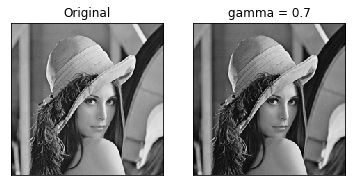

In [21]:
t = 'gamma = {}'.format(gamma)
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Corrected, cmap='gray'),plt.title(t)
plt.xticks([]), plt.yticks([])
plt.show()
#plt.imshow(Corrected, cmap='gray')

## 5

In [250]:
gradim = np.array(np.gradient(img))
sobel=np.hypot(gradim[0],gradim[1])

sobel.shape

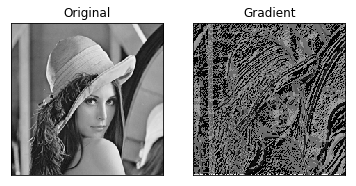

In [254]:
plt.subplot(121),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sobel, cmap='gray'),plt.title('Gradient')
plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
# градиент np сравнить с ручным *и вспомнить что делает np) 

In [255]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)

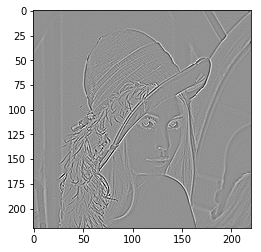

In [257]:
plt.imshow(laplacian, cmap='gray')

In [ ]:
# собелевский филтр 

## 6

In [2]:
def white_balance(img):
    result = cv.cvtColor(img, cv.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv.cvtColor(result, cv.COLOR_LAB2BGR)
    return result

C:\Work_space\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'numpy.ndarray'>
uint8


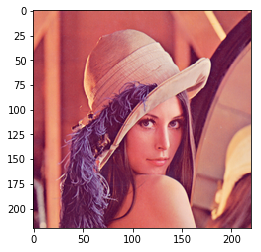

In [22]:
img = cv2.imread('238229409_82443.jpg', cv2.IMREAD_COLOR)
from scipy import misc
img = misc.imread(image_path)
print(type(img))
print(img.dtype)

plt.imshow(img)
plt.show()

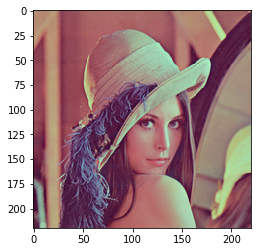

In [23]:
img2 = white_balance(img)
plt.imshow(img2)

In [ ]:
# Посмотреть COLOR_BGR2LAB

## 7

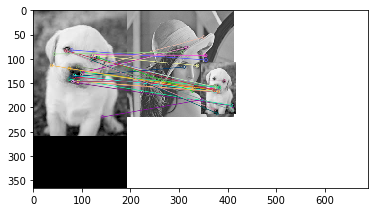

(<matplotlib.image.AxesImage at 0x1e05416bb38>, None)

In [4]:
from matplotlib import pyplot as plt

img1 = cv2.imread('dog.png',0)          # queryImage
img2 = cv2.imread('lena_with_dog.png',0) # trainImage

# Initiate SIFT detector
sift = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Need to draw only good matches, so create a mask
matches = sorted(matches, key = lambda x:x.distance) 
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:30],None, flags=2)

plt.imshow(img3),plt.show()
